# Matplotlib Christmas Tree

12/26/2020

Emulating https://github.com/anvaka/atree by [@anvaka](https://twitter.com/anvaka/), in Matplotlib. Make sure to check out [other versions](https://github.com/anvaka/atree#its-almost-perfect-now), especially [Silvia Hao's version in Wolfram](https://community.wolfram.com/groups/-/m/t/175891): hers is festooned with tinsel-looking, epicycle-ish ornaments!

In [1]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
r = 1
omega = 0.8
theta = np.pi  # Phase offset
tmin = 2 * np.pi
tmax = 10 * np.pi
N = 1000  # Plotting resolution

t = np.linspace(tmin, tmax, N)
x1 = (tmax - t) * r * np.cos(omega * t)
y1 = (tmax - t) * r * np.sin(omega * t)
x2 = (tmax - t) * r * np.cos(omega * t + theta)
y2 = (tmax - t) * r * np.sin(omega * t + theta)

In [3]:
def plot_alternating_alphas(xs, ys, zs, alpha_fg=1, alpha_bg=0.4, ax=None, **kwargs):
    """Plot 3D line, using the x values to switch alpha values."""
    if ax is None:
        ax = plt.gca()

    if "alpha" in kwargs:
        kwargs.pop("alpha")

    zero_crossings = np.where(np.diff(np.sign(xs)))[0] + 1
    zero_crossings = [0, *zero_crossings, -1]

    for start, end, alpha in zip(
        zero_crossings,
        zero_crossings[1:],
        cycle((alpha_fg, alpha_bg) if xs[0] >= 0 else (alpha_bg, alpha_fg))
    ):
        ax.plot(
            xs=xs[start:end],
            ys=ys[start:end],
            zs=zs[start:end],
            alpha=alpha,
            **kwargs
        )

    return ax

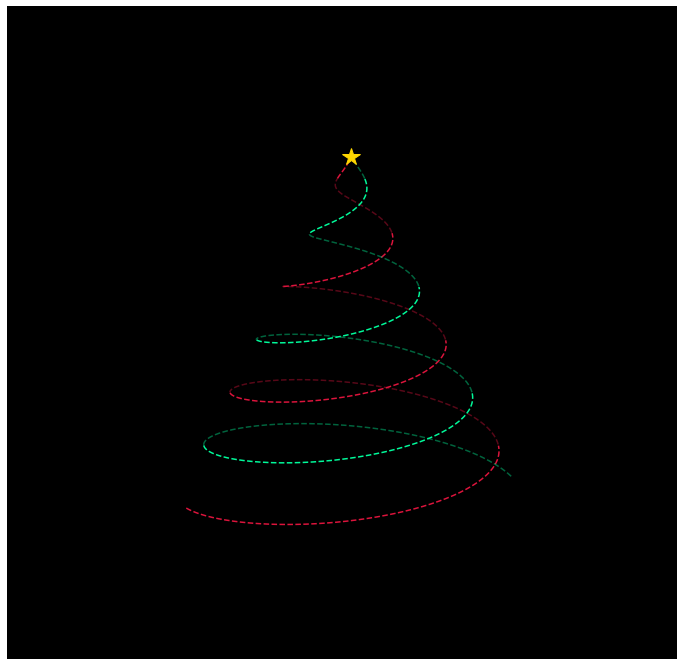

In [4]:
fig = plt.figure(figsize=[12, 12])
ax = fig.add_subplot(111, projection='3d')
ax.axis("off")
ax.set_facecolor('black')
ax.view_init(elev=15, azim=0)

plot_alternating_alphas(xs=x1, ys=y1, zs=t, ax=ax, color="crimson", linestyle="--")
plot_alternating_alphas(xs=x2, ys=y2, zs=t, ax=ax, color="mediumspringgreen", linestyle="--")
plt.plot([0], [0], [t[-1]], marker="*", markersize=18, color="gold")  # Add a star

plt.show()

In [7]:
fig.savefig("christmas-tree.png")
fig.savefig("christmas-tree.pdf")

In [8]:
# Environment
!pip freeze | grep 'matplotlib\|numpy'

matplotlib==3.2.1
numpy==1.18.5
numpydoc==1.0.0
